In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from tqdm import tqdm
import os

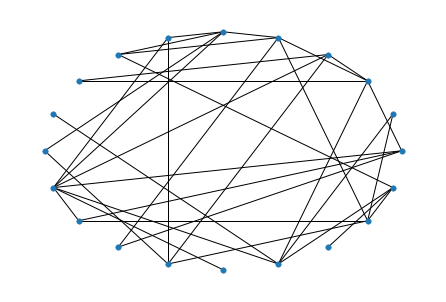

In [145]:
# erdos renyi graph
# generate a graph which has n=20 nodes, probablity p = 0.2.
ER = nx.random_graphs.erdos_renyi_graph(20, 0.2)
# the shell layout
pos = nx.shell_layout(ER)
nx.draw(ER, pos, with_labels = False, node_size = 30)
plt.show()

In [2]:
def cal_social_net(path):
    # if no network data
    if not os.path.exists(path) or os.stat(path).st_size == 0:
        return {'s_num_nodes':0, \
                's_dev_nodes':set(),\
                's_weighted_mean_degree':0,\
                's_num_component':0,\
                's_avg_clustering_coef':0,\
                's_largest_component':0,\
                's_graph_density':0}

    # Processing features in social networks
    G = nx.read_edgelist(path, create_using=nx.DiGraph(), nodetype=str, comments='*', delimiter='##', data=(('weight', int),))
    # all dev nodes
    dev_nodes = set(G.nodes)
    # num. of total nodes
    num_nodes = len(dev_nodes)
    # weighted mean degree
    degrees = G.degree(weight='weight')
    weighted_mean_degree = sum([degree for node, degree in degrees])/num_nodes
    # average clustering coefficient
    avg_clustering_coef = nx.average_clustering(G)
    # betweenness = nx.betweenness_centrality(G, weight='weight')
    graph_density = nx.density(G)

    G = nx.read_edgelist(path, create_using=nx.Graph(), nodetype=str, comments='*', delimiter='##', data=(('weight', int),))
    # num. of dis-connected components
    num_component = nx.number_connected_components(G)
    # largest connected component
    largest_component = len(max(nx.connected_components(G), key=len))
    # num. of nodes in each component
    # num_nodes_component = [list(c) for c in list(nx.connected_components(G))]

    # return the features of the 
    return {'s_num_nodes': num_nodes,\
            's_dev_nodes': dev_nodes,\
            's_weighted_mean_degree':weighted_mean_degree,\
            's_num_component':num_component,\
            's_avg_clustering_coef':avg_clustering_coef,\
            's_largest_component':largest_component,\
            's_graph_density':graph_density}

In [3]:
c_path = './network_data1/commits/'
e_path = './network_data1/emails/'

all_graduated = np.load('all_graduated.npy').tolist()
all_graduated = [x.lower() for x in all_graduated]
all_retired = np.load('all_retired.npy').tolist()
all_retired = [x.lower() for x in all_retired]

In [4]:
the_path = c_path
graduated_nodes = []
graduated_edges = []
graduated_degrees = []
clustering_coef = []
for projid in tqdm(all_graduated):
    for seq_num in range(43):
        this_fname = the_path+projid+'__'+str(seq_num)+".edgelist"
        if not os.path.exists(this_fname):
            continue
        else:
            G = nx.read_edgelist(this_fname, create_using=nx.Graph(), nodetype=str, comments='*', delimiter='##', data=(('weight', int),))
            nodes = len(G)
            edges = G.number_of_edges()
            degrees = G.degree(weight='weight')
            if nodes>0:
                avg_clustering_coef = nx.average_clustering(G)
                clustering_coef.append(avg_clustering_coef)
            #print(nodes)
            #print(edges)
            graduated_nodes.append(nodes)
            graduated_edges.append(edges)
            graduated_degrees.append(degrees)
            


100%|██████████| 204/204 [00:45<00:00,  4.50it/s]


In [5]:
np.median(clustering_coef)

0.0

In [6]:
np.median(graduated_nodes)

69.0

In [7]:
np.mean(graduated_nodes)

163.0144927536232

In [8]:
np.median(graduated_edges)

70.0

In [9]:
np.mean(graduated_edges)

190.67210144927537

In [10]:
the_path = c_path
retired_nodes = []
retired_edges = []
retired_degrees = []
clustering_coef = []
for projid in tqdm(all_retired):
    for seq_num in range(43):
        this_fname = the_path+projid+'__'+str(seq_num)+".edgelist"
        if not os.path.exists(this_fname):
            continue
        else:
            G = nx.read_edgelist(this_fname, create_using=nx.Graph(), nodetype=str, comments='*', delimiter='##', data=(('weight', int),))
            nodes = len(G)
            edges = G.number_of_edges()
            degrees = G.degree(weight='weight')
            if nodes>0:
                avg_clustering_coef = nx.average_clustering(G)
                clustering_coef.append(avg_clustering_coef)
            #print(nodes)
            #print(edges)
            retired_nodes.append(nodes)
            retired_edges.append(edges)
            retired_degrees.append(degrees)

100%|██████████| 59/59 [00:01<00:00, 38.18it/s]


In [11]:
np.median(clustering_coef)

0.0

In [12]:
np.median(retired_nodes)

18.0

In [13]:
np.median(retired_edges)

17.0

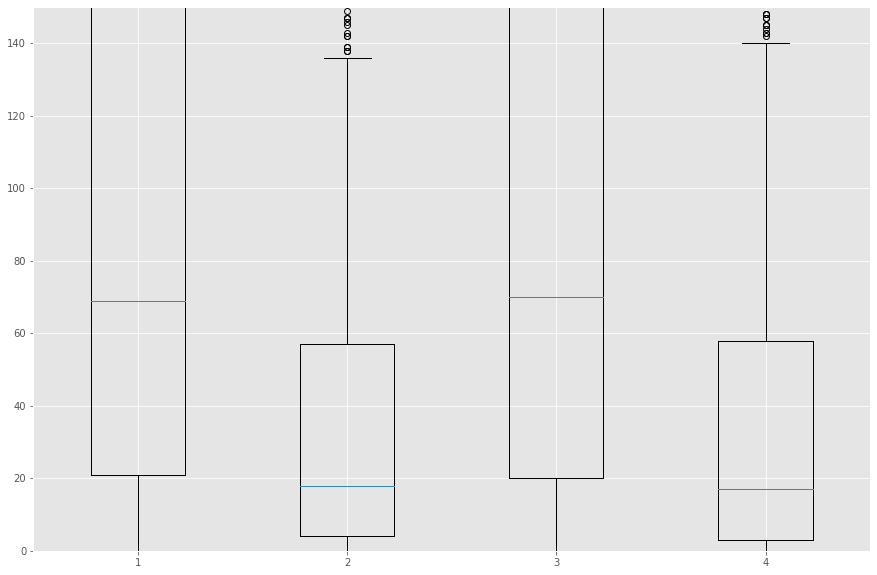

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
plt.boxplot([graduated_nodes,retired_nodes,graduated_edges,retired_edges])
plt.ylim(0, 150)
plt.show()

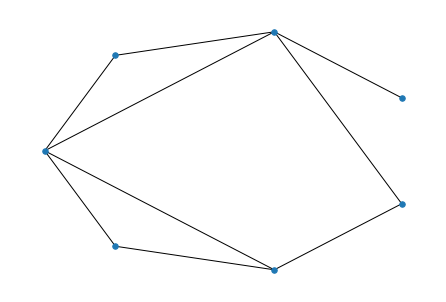

In [73]:
# erdos renyi graph
# generate a graph which has n=20 nodes, probablity p = 0.2.
ER = nx.random_graphs.erdos_renyi_graph(7, 0.5)
# the shell layout
pos = nx.shell_layout(ER)
nx.draw(ER, pos, with_labels = False, node_size = 30)
plt.show()

In [15]:
c_path = './network_data2week/commits/'
e_path = './network_data2week/emails/'


In [16]:
the_path = e_path
graduated_nodes = []
graduated_edges = []
graduated_degrees = []
clustering_coef = []
for projid in tqdm(all_graduated):
    for seq_num in range(150):
        this_fname = the_path+projid+'__'+str(seq_num).zfill(3)+".edgelist"
        if not os.path.exists(this_fname):
            continue
        else:
            G = nx.read_edgelist(this_fname, create_using=nx.Graph(), nodetype=str, comments='*', delimiter='##', data=(('weight', int),))
            nodes = len(G)
            edges = G.number_of_edges()
            degrees = G.degree(weight='weight')
            if nodes>0:
                avg_clustering_coef = nx.average_clustering(G)
                clustering_coef.append(avg_clustering_coef)
            #print(nodes)
            #print(edges)
            graduated_nodes.append(nodes)
            graduated_edges.append(edges)
            graduated_degrees.append(degrees)
            


100%|██████████| 204/204 [00:03<00:00, 56.31it/s]


In [17]:
np.median(clustering_coef)

0.5133333333333334

In [18]:
np.median(graduated_nodes)

9.0

In [19]:
np.median(graduated_edges)

12.0

In [20]:
the_path = e_path
retired_nodes = []
retired_edges = []
retired_degrees = []
clustering_coef = []
for projid in tqdm(all_retired):
    for seq_num in range(43):
        this_fname = the_path+projid+'__'+str(seq_num).zfill(3)+".edgelist"
        if not os.path.exists(this_fname):
            continue
        else:
            G = nx.read_edgelist(this_fname, create_using=nx.Graph(), nodetype=str, comments='*', delimiter='##', data=(('weight', int),))
            nodes = len(G)
            edges = G.number_of_edges()
            degrees = G.degree(weight='weight')
            if nodes>0:
                avg_clustering_coef = nx.average_clustering(G)
                clustering_coef.append(avg_clustering_coef)
            #print(nodes)
            #print(edges)
            retired_nodes.append(nodes)
            retired_edges.append(edges)
            retired_degrees.append(degrees)

100%|██████████| 59/59 [00:00<00:00, 267.59it/s]


In [21]:
np.median(clustering_coef)

0.5555555555555556

In [22]:
np.median(retired_nodes)

5.0

In [23]:
np.median(retired_edges)

6.0

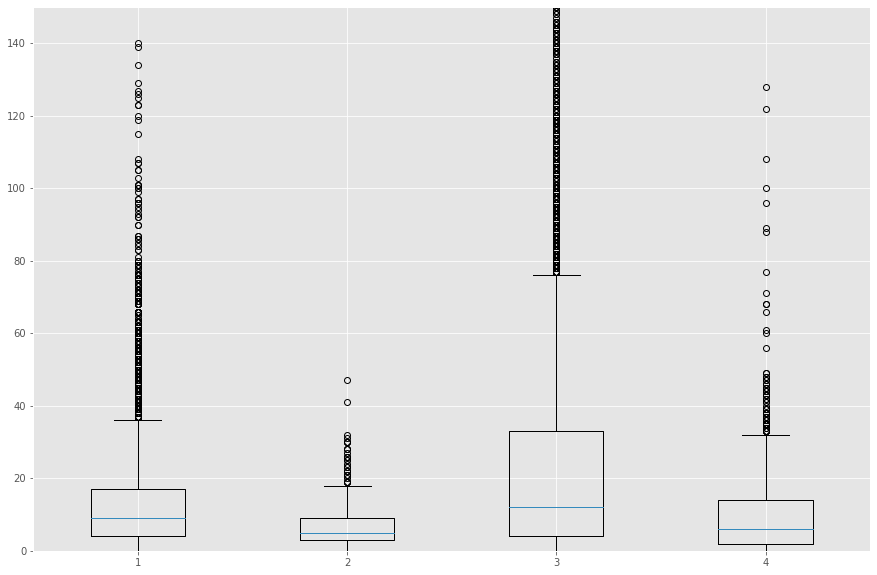

In [25]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
plt.boxplot([graduated_nodes,retired_nodes,graduated_edges,retired_edges])
plt.ylim(0, 150)
plt.show()

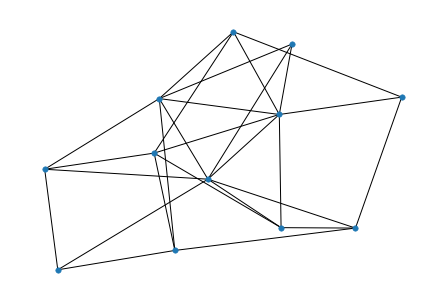

In [26]:
# BA scale-free degree network
# generalize BA network which has 20 nodes, m = 1
BA = nx.random_graphs.barabasi_albert_graph(12, 3)
# spring layout
pos = nx.spring_layout(BA)
nx.draw(BA, pos, with_labels = False, node_size = 30)
plt.show()

In [88]:
nx.average_clustering(BA)

0.5644179894179894

In [89]:
BA.number_of_edges()

27

In [90]:
BA.number_of_nodes()

12

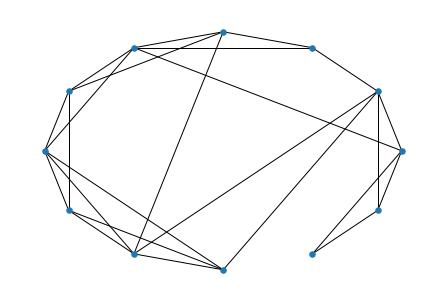

In [105]:
WS = nx.random_graphs.watts_strogatz_graph(12, 5, 0.2)
# circular layout
pos = nx.circular_layout(WS)
nx.draw(WS, pos, with_labels = False, node_size = 30)
plt.show()

In [106]:
nx.average_clustering(WS)

0.4916666666666667

In [107]:
WS.number_of_edges()

24

In [58]:
WS.nodes

NodeView((0, 1, 2, 3, 4, 5, 6))

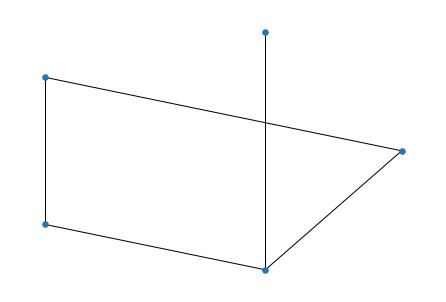

In [125]:
WS = nx.random_graphs.watts_strogatz_graph(5, 2, 0.5)
# circular layout
pos = nx.circular_layout(WS)
nx.draw(WS, pos, with_labels = False, node_size = 30)
plt.show()

In [126]:
nx.average_clustering(WS)

0.0

In [127]:
WS.number_of_edges()

5

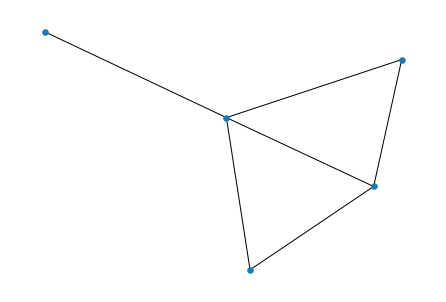

In [129]:
# BA scale-free degree network
# generalize BA network which has 20 nodes, m = 1
BA = nx.random_graphs.barabasi_albert_graph(5, 2)
# spring layout
pos = nx.spring_layout(BA)
nx.draw(BA, pos, with_labels = False, node_size = 30)
plt.show()

In [130]:
nx.average_clustering(BA)

0.6

In [135]:
set(BA.edges)

{(0, 1), (0, 2), (0, 3), (0, 4), (2, 3), (2, 4)}

In [27]:
random_graduated_networks = []
random_retired_networks = []

for i in range(12):
    random_graduated_networks.append(nx.random_graphs.barabasi_albert_graph(20, 3))
    random_retired_networks.append(nx.random_graphs.barabasi_albert_graph(6, 2))
for i in range(12):
    random_graduated_networks.append(nx.random_graphs.barabasi_albert_graph(70, 3))
    random_retired_networks.append(nx.random_graphs.barabasi_albert_graph(20, 2))
for i in range(12):
    random_graduated_networks.append(nx.random_graphs.barabasi_albert_graph(165, 3))
    random_retired_networks.append(nx.random_graphs.barabasi_albert_graph(56, 2))

In [28]:
graduated_overlap = []
retired_overlap = []

In [29]:
def sets_overlap_unweighted(net1, net2):
    net1_set = set(net1.edges())
    net2_set = set(net2.edges())
    intersection_edges = net1_set.intersection(net2_set)
    return len(intersection_edges) / min([len(net1_set), len(net2_set)])

In [30]:
for i in range(36-1):
    graduated_overlap.append(sets_overlap_unweighted(random_graduated_networks[i], random_graduated_networks[i+1]))
    retired_overlap.append(sets_overlap_unweighted(random_retired_networks[i], random_retired_networks[i+1]))

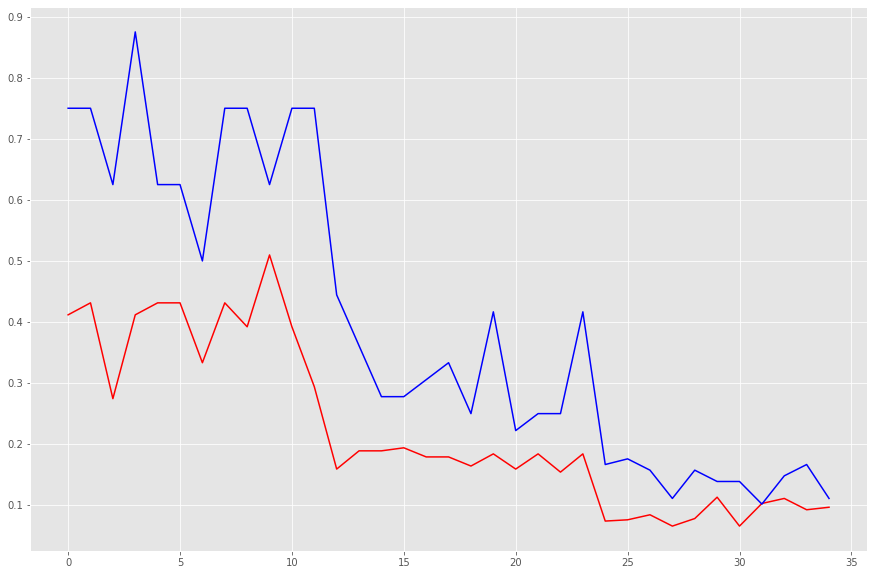

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

x = [x for x in range(36-1)]

plt.plot(x,graduated_overlap,color = 'r', label = "Graduated")
plt.plot(x,retired_overlap,color = 'b', label = "Retired")